# *********Black Friday Sales Prediction*********:
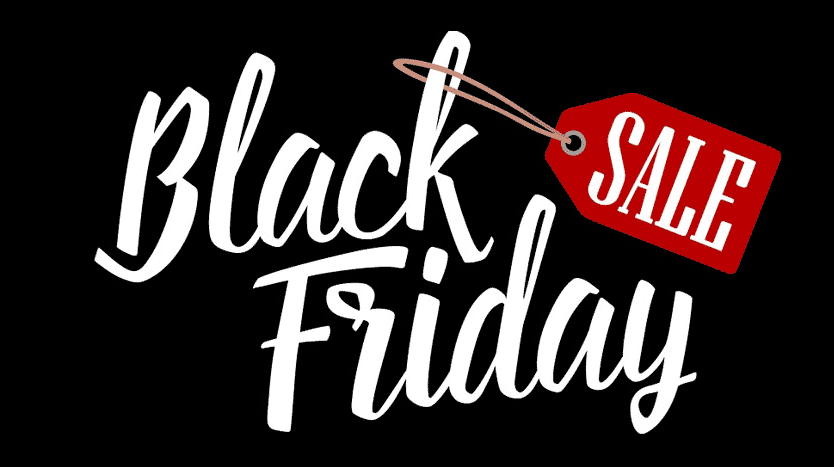





A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.


Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


Data
Variable	Definition
User_ID	User ID
Product_ID	Product ID
Gender	Sex of User
Age	Age in bins
Occupation	Occupation (Masked)
City_Category	Category of the City (A,B,C)
Stay_In_Current_City_Years	Number of years stay in current city
Marital_Status	Marital Status
Product_Category_1	Product Category (Masked)
Product_Category_2	Product may belongs to other category also (Masked)
Product_Category_3	Product may belongs to other category also (Masked)
Purchase	Purchase Amount (Target Variable)


Your model performance will be evaluated on the basis of your prediction of the purchase amount for the test data (test.csv), which contains similar data-points as train except for their purchase amount. Your submission needs to be in the format as shown in "SampleSubmission.csv".

We at our end, have the actual purchase amount for the test dataset, against which your predictions will be evaluated. Submissions are scored on the root mean squared error (RMSE). RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors:


Where y hat is the predicted value and y is the original value.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from xgboost import XGBClassifier,XGBRegressor,XGBRFClassifier
import warnings       # To ignore any warnings 
warnings.filterwarnings("ignore")


In [ ]:
dataset = pd.read_csv("train.csv")
dataset.head()

In [ ]:
dataset.shape

In [ ]:
dataset.info()

In [ ]:
dataset.describe() #on a des valeurs manquantes 2 colonne Product_Category_3	,Product_Category_2

# Analyse des données : EDA

In [ ]:
for col in dataset:
    print(f'{col :-<50} {dataset[col].unique()}')

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.isna(), cbar=False)

In [ ]:
(dataset.isna().sum()/dataset.shape[0]).sort_values(ascending=True)

In [ ]:
# dataset = dataset.drop("User_ID",axis=1)

####  1- Analyse des variables categorielle 


Gender-------------------------------------------- ['F' 'M']
Age----------------------------------------------- ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation---------------------------------------- [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category------------------------------------- ['A' 'C' 'B']
Stay_In_Current_City_Years------------------------ ['2' '4+' '3' '1' '0']
Marital_Status------------------------------------ [0 1]
Product_Category_1-------------------------------- [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2-------------------------------- [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3-------------------------------- [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]

In [ ]:
dataset['Product_ID'] = dataset['Product_ID'].astype("object")# on la catégorise 
dataset['Occupation'] = dataset['Occupation'].astype("object")# on la catégorise 
dataset['Marital_Status'] = dataset['Marital_Status'].astype("object")# on la catégorise 
dataset['Product_Category_1'] = dataset['Product_Category_1'].astype("object")# on la catégorise 
dataset['Product_Category_2'] = dataset['Product_Category_2'].astype("object")# on la catégorise 
dataset['Product_Category_3'] = dataset['Product_Category_3'].astype("object")# on la catégorise 




In [ ]:
dataset.info()

In [ ]:
dataset= dataset.drop("Product_ID",axis=1)

In [ ]:
for x in dataset.select_dtypes("object"):
    plt.figure(figsize=(20,8))
    sns.countplot(dataset[x])
    plt.show()



In [ ]:
dataset["pro1>25000"]= (dataset['Product_Category_1']==8 )| (dataset['Product_Category_1']==1) | (dataset['Product_Category_1']==5)



In [ ]:
dataset["pro1>25000"] = dataset["pro1>25000"].apply(lambda x: 1 if x==True else 0)###new features

In [ ]:
dataset["pro2>10000"]= (dataset['Product_Category_2']==3 )| (dataset['Product_Category_2']==7) | (dataset['Product_Category_2']==9)|(dataset['Product_Category_2']==10)|(dataset['Product_Category_2']==12)|(dataset['Product_Category_2']==18)


In [ ]:
dataset["pro2>10000"] = dataset["pro2>10000"].apply(lambda x: 1 if x==True else 0)

In [ ]:
dataset["pro2>30000"]= (dataset['Product_Category_2']==4 )| (dataset['Product_Category_2']==5) | (dataset['Product_Category_2']==6)|(dataset['Product_Category_2']==11)|(dataset['Product_Category_2']==17)


In [ ]:
dataset["pro2>30000"] = dataset["pro2>30000"].apply(lambda x: 1 if x==True else 0)

In [ ]:
dataset["pro2>100000"]= (dataset['Product_Category_2']==2 )| (dataset['Product_Category_2']==8) | (dataset['Product_Category_2']==14)|(dataset['Product_Category_2']==15)|(dataset['Product_Category_2']==16)


In [ ]:
dataset["pro2>100000"] = dataset["pro2>100000"].apply(lambda x: 1 if x==True else 0)

In [ ]:
dataset["pro3>5000"]= (dataset['Product_Category_3']==3 )| (dataset['Product_Category_3']==4) | (dataset['Product_Category_3']==6)|(dataset['Product_Category_3']==10)|(dataset['Product_Category_3']==11)|(dataset['Product_Category_3']==13)|(dataset['Product_Category_3']==18)


In [ ]:
dataset["pro3>5000"] = dataset["pro3>5000"].apply(lambda x: 1 if x==True else 0)

In [ ]:
dataset["pro3>15000"]= (dataset['Product_Category_3']==8 )| (dataset['Product_Category_3']==9) | (dataset['Product_Category_3']==12)|(dataset['Product_Category_3']==17)


In [ ]:
dataset["pro3>15000"] = dataset["pro3>15000"].apply(lambda x: 1 if x==True else 0)

In [ ]:
dataset["pro3>30000"]= (dataset['Product_Category_3']==5 )| (dataset['Product_Category_3']==14) | (dataset['Product_Category_3']==15)|(dataset['Product_Category_3']==16)


In [ ]:
dataset["pro3>30000"] = dataset["pro3>30000"].apply(lambda x: 1 if x==True else 0)

In [ ]:
dataset.head()

In [ ]:

# dataset_M = dataset[dataset["Gender"]=="M"]

 
plt.figure(figsize=(20,10))
plt.subplot(121) 
sns.boxplot(dataset[dataset["Gender"]=="M"].Purchase).set_title("M")
plt.subplot(122) 
sns.boxplot(dataset[dataset["Gender"]=="F"].Purchase).set_title("F")
plt.show()


In [ ]:
 
plt.figure(figsize=(20,10))
plt.subplot(121) 
sns.boxplot(dataset["Purchase"])
plt.subplot(122) 
sns.lineplot(dataset["Age"],dataset["Purchase"])
plt.show()

In [ ]:
 
plt.figure(figsize=(20,10))
plt.subplot(121) 
dataset.groupby(['City_Category'])['Purchase'].mean().plot()
plt.subplot(122) 
sns.boxplot(x="City_Category", y="Purchase", data=dataset)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121) 
dataset.groupby(['Marital_Status'])['Purchase'].mean().plot()
plt.subplot(122) 
sns.boxplot(x="Marital_Status", y="Purchase", data=dataset)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121) 
sns.boxplot(x="Stay_In_Current_City_Years", y="Purchase", data=dataset)
plt.subplot(122) 
sns.lineplot(dataset["Stay_In_Current_City_Years"],dataset["Purchase"])
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121) 
sns.boxplot(x="Occupation", y="Purchase", data=dataset)
plt.subplot(122) 
dataset.groupby(['Occupation'])['Purchase'].mean().plot()
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121) 
sns.boxplot(x="Product_Category_1", y="Purchase", data=dataset)
plt.subplot(122) 
sns.lineplot(dataset["Product_Category_1"],dataset["Purchase"])
plt.show()

In [ ]:
#  7   Product_Category_1          550068 non-null  object
#  8   Product_Category_2          376430 non-null  object
#  9   Product_Category_3          166821 non-null  object

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121) 
sns.boxplot(x="Product_Category_2", y="Purchase", data=dataset)
plt.subplot(122) 
sns.lineplot(dataset["Product_Category_2"],dataset["Purchase"])
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121) 
sns.boxplot(x="Product_Category_3", y="Purchase", data=dataset)
plt.subplot(122) 
sns.lineplot(dataset["Product_Category_3"],dataset["Purchase"])
plt.show()

In [ ]:
from scipy.stats import norm
sns.distplot(dataset["Purchase"],fit=norm)


In [ ]:
sns.distplot(np.log10(dataset["Purchase"] ),fit=norm)

# Data preprocessing

In [ ]:
dataset.isna().sum()

In [ ]:
dataset.shape

In [ ]:
dataset.info()

In [ ]:
dataset_dum = pd.get_dummies(data=dataset,columns=["Gender","Age","City_Category","Marital_Status","Stay_In_Current_City_Years"])

In [ ]:
dataset_dum["Product_Category_1"] =dataset_dum["Product_Category_1"].astype(int)

In [ ]:
# dataset_dum_1 = dataset_dum.drop(["Product_Category_2","Product_Category_3"],axis=1)

In [ ]:
from sklearn.impute import MissingIndicator
miss= pd.DataFrame(MissingIndicator().fit_transform(dataset_dum))

In [ ]:
miss =miss.rename(columns={0:"miss_p2",1:"miss_p3"})

In [ ]:
miss["miss_p2"] = miss["miss_p2"].apply(lambda x: 1 if x==True else 0)

In [ ]:
miss["miss_p3"] = miss["miss_p3"].apply(lambda x: 1 if x==True else 0)

In [ ]:
miss.head()

In [ ]:
dataset_dum_2 = pd.concat([dataset_dum,miss], axis=1)

In [ ]:
dataset_dum_2 = dataset_dum_2.drop(["Product_Category_2","Product_Category_3"],axis=1)

In [ ]:
dataset_dum_2.shape

In [ ]:
userAvgPurchase = dataset.groupby('User_ID').agg({'Purchase':np.mean}).reset_index().rename(columns={'Purchase':'User_Avg_Purchase'})

In [ ]:
dataset_dum_2 = pd.merge(dataset_dum_2,userAvgPurchase,on='User_ID',how='left')
# dataset = pd.get_dummies(dataset)

In [ ]:
# dataset_dum_1 = dataset_dum_1.drop("User_ID",axis=1)
dataset_dum_2 = dataset_dum_2.drop("User_ID",axis=1)

In [ ]:
# dataset_dum_1.head()
dataset_dum_2.head()

In [ ]:
dataset_dum_2["Product_Category_1"].unique()

# Modélisation :



## L'objectif

#### construire un modèle pour prédire le montant d'achat du client par rapport à divers produits,

#### Le variable cible a predire est Purachse elle varie de 0 a 2500 



## Métrique d'évaluation:

#### la RMSE est notre metrique d'évaluation : (cette metrique penalise beaucoup les grandes  erreurs)

![image.png](attachment:image.png)

In [ ]:
## base model

In [ ]:
X= dataset_dum_2.drop("Purchase",axis=1)
y= dataset_dum_2["Purchase"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_train = pca.fit(X_train)
pca_test = pca.fit_transform(X_test)
print(pca.explained_variance_ratio_)

In [147]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
model_RG = RandomForestRegressor()

In [149]:
model_RG.fit(X_train,y_train)

RandomForestRegressor()

In [150]:
from sklearn.metrics import mean_squared_error

In [151]:
print (model_RG.score(X_test,y_test))

print (model_RG.score(X_train,y_train))

0.6532726361297193
0.8046226422780434


In [152]:
y_pred = model_RG.predict(X_test)


print("RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE :  2956.064688355654


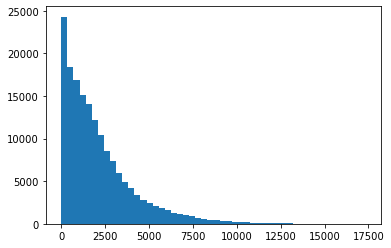

In [153]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
estimator = RandomForestRegressor()
para_grids = {
            "n_estimators" : [50,100,200],
            
           
            "max_depth"      :    [5,9,12]
        }


grid = RandomizedSearchCV(estimator, para_grids,cv=3 ,scoring = 'neg_mean_absolute_error',)


In [ ]:
grid.fit(X_train,y_train)

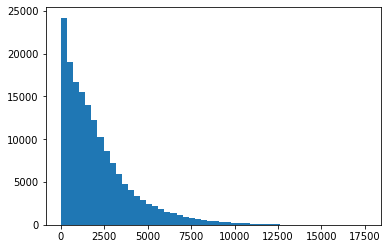

In [57]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression
model_lr= LinearRegression()
model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)
model_lr_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : " ,model_lr_rmse)

RMSE :  4427.679759831982


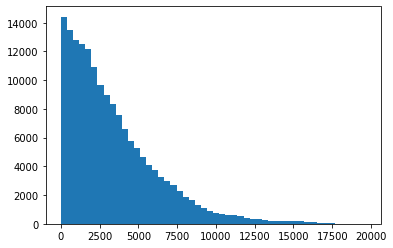

In [59]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [61]:

kf = KFold(n_splits=10, shuffle=True, random_state=12)

In [62]:
# def crossVal(model):
#     kf = KFold(n_splits=10, shuffle=True, random_state=12)
#     score = - cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf, n_jobs=10)
#     model_rmse = np.sqrt(score).mean()
#     return model_rmse

In [63]:
# crossVal(model_RG)

In [64]:
model_gr = GradientBoostingRegressor(learning_rate = 0.5)
model_gr.fit(X_train, y_train)
y_pred = model_gr.predict(X_test)


In [65]:
print("RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE :  2871.96356027206


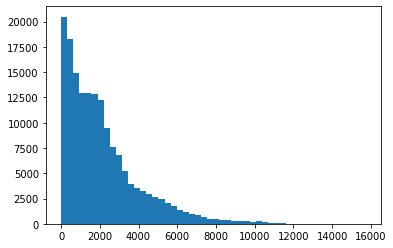

In [66]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [67]:

import xgboost as xgb

model_xgb = xgb.XGBRegressor(learning_rate=0.07,n_estimators=300)                                                                 

In [68]:
model_xgb.fit(X_train,y_train)

[18:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [69]:
y_pred = model_RG.predict(X_test)
print("RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE :  2937.3725957016927


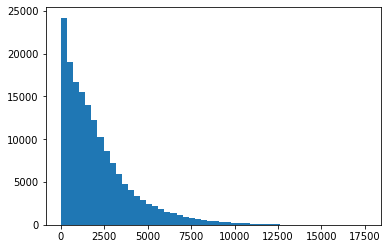

In [70]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [71]:
# Elastic Net
params = {'alpha': [.001, .01, .1], 'max_iter': [2, 3, 4] } 
elnet = ElasticNet()
elasticNet = GridSearchCV(elnet, param_grid=params, cv=kf)
elasticNet.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=12, shuffle=True),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1], 'max_iter': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
y_pred = elasticNet.best_estimator_.predict(X_test)
elnet_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE : " ,elnet_rmse)

RMSE :  4420.894272487369


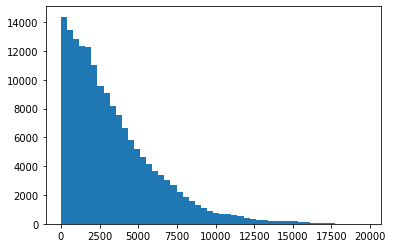

In [73]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [74]:
params = {'alpha': [.001, .005, .003], 'max_iter': [2,3,4]} 
laso = GridSearchCV(estimator=Lasso(), param_grid=params, cv=kf)
laso.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=12, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.005, 0.003], 'max_iter': [2, 3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
y_pred = laso.predict(X_test)
laso_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : " ,laso_rmse)

RMSE :  4420.89560119058


In [76]:
laso.best_estimator_

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=4, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

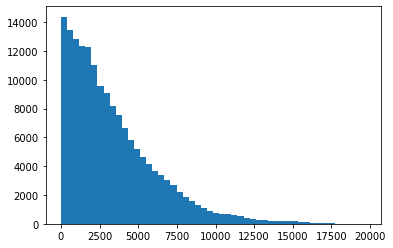

In [77]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [78]:
# from sklearn.svm import SVR# veryyyyy long
# model_svr = SVR(kernel='linear')
# model_svr.fit(X_train,y_train)
# y_pred = model_svr.predict(X_test)
# print("RMSE : " ,np.sqrt(mean_squared_error(y_test,y_pred)))

In [79]:
# ereur = np.abs(y_test-y_pred)
# plt.hist(ereur,bins=50)
# plt.show()

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
# from sklearn.neighbors import KNeighborsRegressor
# neigh = KNeighborsRegressor(n_neighbors=5)
# neigh.fit(X_train, y_train)
# y_pred = neigh.predict(X_test)
# neigh_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
# print("RMSE : " ,stack_rmse)

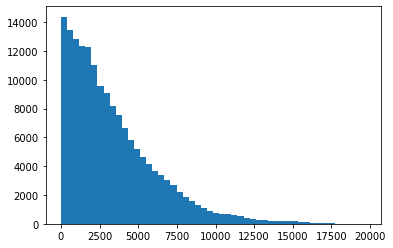

In [82]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [83]:
# get a list of models to evaluate
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
 
# evaluate a given model using cross-validation
estimators = [('ranom_forest1', RandomForestRegressor()),("reg_lin",LinearRegression()),("gr_b",GradientBoostingRegressor(learning_rate = 0.5)),
               ("xgboost",xgb.XGBRegressor(learning_rate=0.07,n_estimators=300))]
reg = StackingRegressor(estimators=estimators,final_estimator=LinearRegression())


In [87]:
reg.fit(X_train,y_train)

[18:59:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:31:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=None,
                  estimators=[('ranom_forest1',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                          

In [88]:
y_pred = reg.predict(X_test)
stack_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : " ,stack_rmse)

RMSE :  2831.419519870988


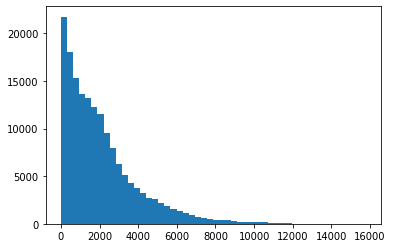

In [89]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

In [93]:
from sklearn.ensemble import VotingRegressor
vreg = VotingRegressor( [('ranom_forest1', RandomForestRegressor()),("reg_lin",LinearRegression()),("gr_b",GradientBoostingRegressor(learning_rate = 0.5)),
               ("xgboost",xgb.XGBRegressor(learning_rate=0.07,n_estimators=300))
              ,("xgboost2",xgb.XGBRegressor(learning_rate=0.05,n_estimators=500))])

In [94]:
vreg.fit(X_train,y_train)

[20:01:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:03:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('ranom_forest1',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                          

In [95]:
y_pred = vreg.predict(X_test)
vreg_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE : " ,vreg_rmse)

RMSE :  2922.9659903150896


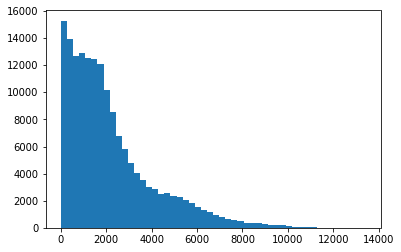

In [96]:
ereur = np.abs(y_test-y_pred)
plt.hist(ereur,bins=50)
plt.show()

# **Submission**

In [309]:
test = pd.read_csv("/content/drive/My Drive/test.csv")

In [310]:
test['Product_ID'] =test['Product_ID'].astype("object")# on la catégorise 
test['Occupation'] =test['Occupation'].astype("object")# on la catégorise 
test['Marital_Status'] =test['Marital_Status'].astype("object")# on la catégorise 
test['Product_Category_1'] =test['Product_Category_1'].astype("object")# on la catégorise 
test['Product_Category_2'] =test['Product_Category_2'].astype("object")# on la catégorise 
test['Product_Category_3'] =test['Product_Category_3'].astype("object")# on la catégorise 



    

In [311]:
test1= test.drop("Product_ID",axis=1)

In [312]:
test_dum = pd.get_dummies(data=test1,columns=["Gender","Age","Occupation","City_Category","Marital_Status","Stay_In_Current_City_Years"])

In [317]:
test_dum["Product_Category_1"] =test_dum["Product_Category_1"].astype(int)

In [318]:
from sklearn.impute import MissingIndicator
miss= pd.DataFrame(MissingIndicator().fit_transform(test_dum))

In [319]:
miss =miss.rename(columns={0:"miss_p2",1:"miss_p3"})

In [320]:
miss["miss_p2"] = miss["miss_p2"].apply(lambda x: 1 if x==True else 0)

In [324]:
miss["miss_p3"] = miss["miss_p3"].apply(lambda x: 1 if x==True else 0)

In [325]:
test_dum_2 = pd.concat([test_dum,miss], axis=1)

In [326]:
test_dum_2 = test_dum_2.drop(["Product_Category_2","Product_Category_3"],axis=1)

In [327]:
test_dum_2 = pd.merge(test_dum_2,userAvgPurchase,on='User_ID',how='left')

In [328]:
test_dum_2 = test_dum_2.drop("User_ID",axis=1)

In [329]:
test_dum_2.shape

(233599, 44)

In [346]:
# scaler = StandardScaler()
test_dum_2_sc = scaler.transform(test_dum_2)

In [347]:
y_pred =(vreg.predict(test_dum_2_sc))

In [348]:
y_pred2 = (reg.predict(test_dum_2_sc))

In [349]:
# y_pred.to_csv("solution.csv",index=False)

In [350]:
submission=pd.read_csv("/content/drive/My Drive/sample_submission_V9Inaty.csv")

In [351]:
submission["Purchase"]=y_pred
submission[["User_ID","Product_ID"]]=test[["User_ID","Product_ID"]]

In [352]:
submission.shape

(233599, 3)

In [353]:
y_pred.shape

(233599,)

In [354]:
pd.DataFrame(submission, columns=["Purchase","User_ID","Product_ID"]).to_csv("sol.csv", index=False)